In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from skimage.transform import resize, radon, iradon

In [2]:
def crop_to_square(img):
    h, w = img.shape
    min_dim = min(h, w)
    top = (h - min_dim) // 2
    left = (w - min_dim) // 2
    return img[top:top + min_dim, left:left + min_dim]

#Setup 
nxd = 182
theta = np.linspace(0., 180., max(nxd, 180), endpoint=False)

In [4]:
import nibabel as nib
import random

#Load files
paths = ["PET_data/LondonPride_000101_dynPET.img"]

img = nib.load(paths[0])
pet_data = img.get_fdata(dtype=np.float32)

# Get full Z range and calculate start and end
total_slices = pet_data.shape[2]
center = total_slices // 2

#print(z_start, z_end)

# Get full t range and calculate start and end
total_slices = pet_data.shape[3]
center_t = total_slices // 2

slice_img = pet_data[:, :, center-1, center_t]
image_cropped = crop_to_square(slice_img)
image_resized = resize(image_cropped, (nxd, nxd), anti_aliasing=True)
image = image_resized.astype(np.float32)
        
# Generate sinogram
sino_clean = radon(image_resized, theta=theta, circle=True)
sinogram = sino_clean


/scratch/bggjem001/picoPET-sim/.venv/lib64/python3.9/site-packages/skimage/transform/radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


In [13]:
# Define proper s-axis values
num_detectors = sinogram.shape[0]
s = np.linspace(-num_detectors/2, num_detectors/2, num_detectors)

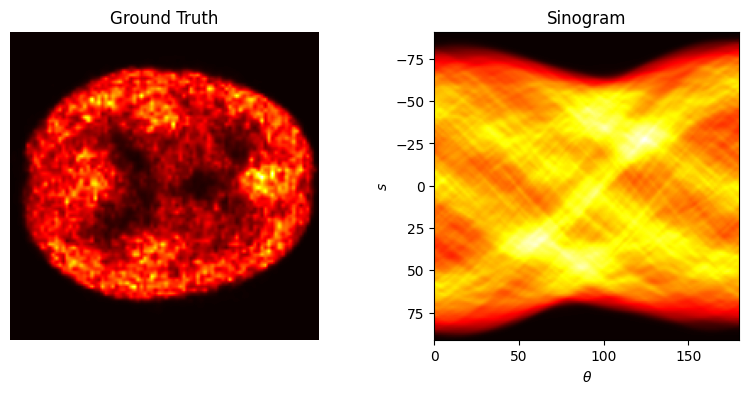

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].imshow(image, cmap='hot')
axs[0].set_title("Ground Truth")
axs[0].axis('off')

axs[1].imshow(sinogram,cmap='hot', extent=(0, 180, s[-1], s[0]),)
axs[1].set_title(f"Sinogram")
axs[1].set_xlabel(r"$\theta$")
axs[1].set_ylabel(r"$s$")

plt.show()

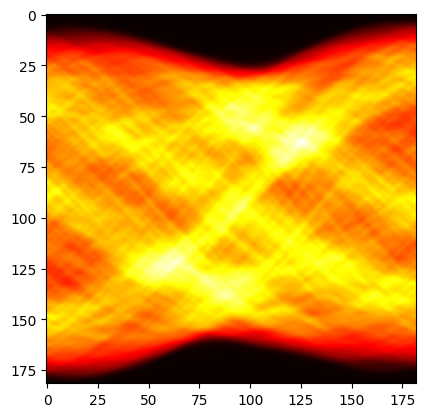

In [46]:
plt.imshow(sinogram, cmap="hot")
plt.show()

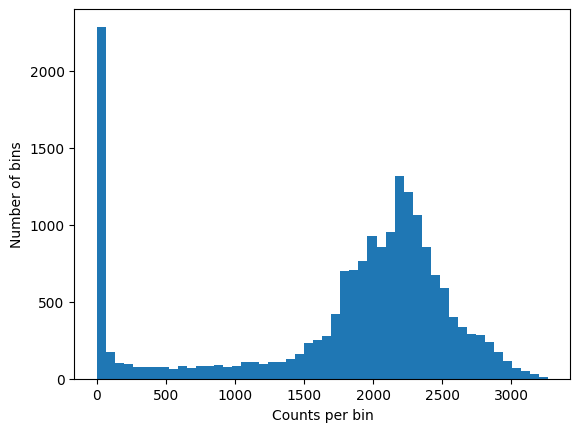

In [43]:
import statistics

#Plotting the distribution of bins in one sinogram

plt.hist(sinogram.ravel(), bins=50) #ravel flattens array into a 1D array
plt.xlabel("Counts per bin")
plt.ylabel("Number of bins")
plt.show()


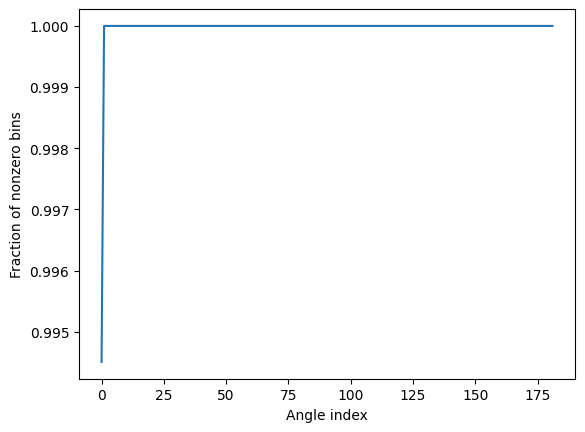

In [47]:
nonzero_fraction = (sinogram > 0).mean(axis=1)
plt.plot(nonzero_fraction)
plt.xlabel("Angle index")
plt.ylabel("Fraction of nonzero bins")
plt.show()